In [ ]:
# imports
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
train_X = pd.read_pickle('Xtraining')

In [ ]:
train_Y = pd.read_pickle('Ytraining_')

In [ ]:
train_X.shape, train_Y.shape

((60000, 784), (60000,))

In [ ]:
xtrain, xtest ,ytrain, ytest = train_test_split(
    train_X,
    train_Y,
    test_size =0.2,
    shuffle = True,
    random_state =7
)

xtrain.shape , xtest.shape ,ytrain.shape, ytest.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs", 
    C=20, 
    random_state=42, 
    max_iter=60000
)
lr.fit(xtrain, ytrain)

LogisticRegression(C=20, max_iter=60000, multi_class='multinomial',
                   random_state=42)

In [ ]:
ypred_lr = lr.predict(xtest)
ypred_lr

array([4, 7, 9, ..., 1, 3, 9], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(ytest, ypred_lr)
conf

array([[1036,    1,   14,    9,    2,   37,   25,    3,    8,    9],
       [   0, 1238,   21,   12,    0,   17,    3,   11,   37,    4],
       [  14,   27,  909,   26,   22,   16,   44,   16,   46,    9],
       [  17,   23,   60,  951,    6,   90,    9,   17,   53,   18],
       [   6,   10,   25,    5,  960,   18,   29,   18,   17,  110],
       [  25,   14,   23,   55,   24,  842,   30,   17,   52,   29],
       [  22,   15,   24,    6,   20,   27, 1058,    1,   20,    8],
       [   6,   25,   22,   20,   24,    7,    0, 1082,   12,   95],
       [  13,   52,   40,   58,   21,   59,   18,    9,  898,   33],
       [  14,   11,   10,   23,   89,   24,    4,   92,   27,  842]])

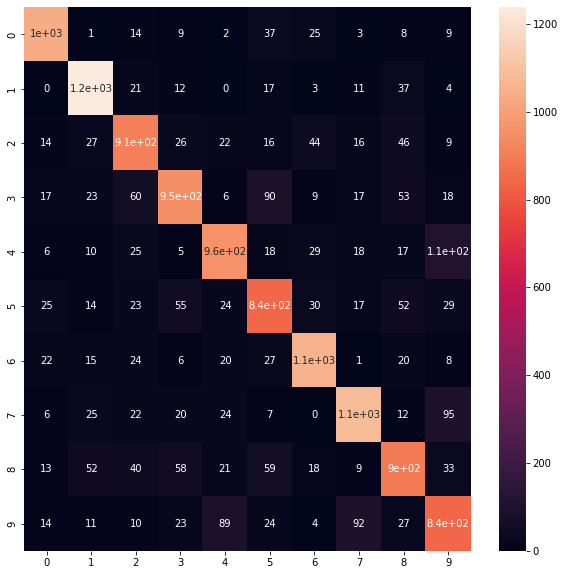

In [ ]:
import seaborn as sn

conf = confusion_matrix(ytest, ypred_lr)
df_cm = pd.DataFrame(conf)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain ,ytrain)
ypred_knn = knn.predict(xtest)

array([[1096,    8,    3,    1,    1,    5,   24,    1,    1,    4],
       [   1, 1326,    6,    1,    2,    1,    2,    2,    0,    2],
       [  22,  141,  883,   11,   14,    3,   14,   21,   17,    3],
       [   8,   98,   21, 1018,    6,   31,    5,   14,   21,   22],
       [   2,   55,    1,    3,  955,    3,   13,   25,    1,  140],
       [  28,   59,    1,   83,   26,  847,   25,    3,   10,   29],
       [  23,   41,    2,    0,   11,   14, 1104,    2,    3,    1],
       [   2,   96,    3,    2,   22,    3,    0, 1107,    2,   56],
       [  27,  151,    5,   60,   27,   39,   16,   25,  817,   34],
       [  12,   50,    2,   14,   79,    4,    2,   97,    4,  872]])

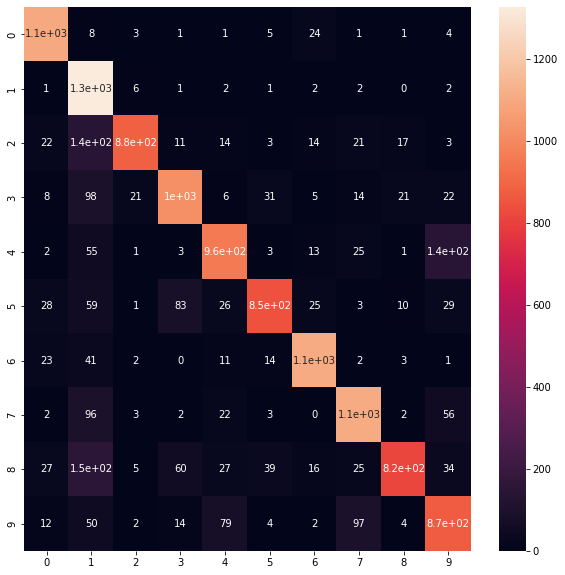

In [ ]:
import seaborn as sn

conf = confusion_matrix(ytest,ypred_knn)
df_cm = pd.DataFrame(conf)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(verbose=True)
rf.fit(xtrain , ytrain)
ypred_rf = rf.predict(xtest)
conf = confusion_matrix(ytest,ypred_rf)
conf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


array([[1061,    1,    8,    5,    2,    8,   41,    4,   12,    2],
       [   1, 1292,   17,    8,    2,    3,    2,    5,    9,    4],
       [  21,   20,  953,   14,   14,    1,   47,   19,   32,    8],
       [  14,   15,   45, 1016,    7,   50,    6,   16,   40,   35],
       [  11,    5,   14,    5,  938,    6,   41,   18,   19,  141],
       [  34,   19,   12,  135,   41,  737,   33,   14,   36,   50],
       [  34,   15,   27,    8,   18,   12, 1068,    5,   14,    0],
       [   8,   26,   26,    6,   25,    3,    3, 1112,   17,   67],
       [  20,   42,   61,   68,   19,   28,   25,    8,  896,   34],
       [  18,   14,   14,   21,   98,   10,    6,   52,   33,  870]])

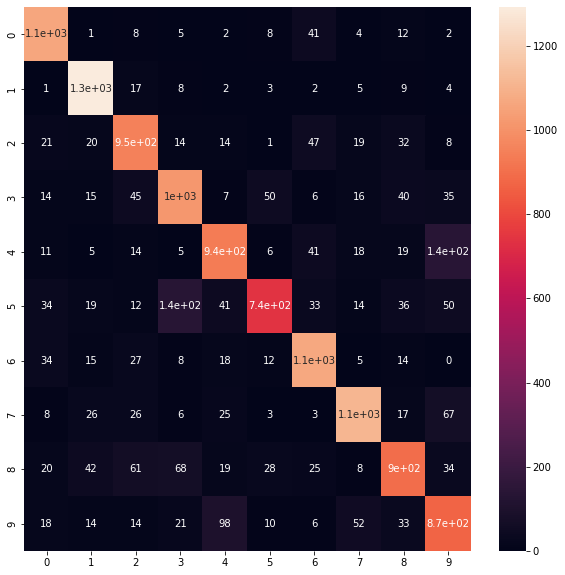

In [ ]:
import seaborn as sn

conf = confusion_matrix(ytest,ypred_rf)
df_cm = pd.DataFrame(conf)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('rf', rf)],
    voting='hard')

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(voting_clf, xtest, ytest, cv=5)
f1_score(ytest, y_train_pred, average="micro")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.8048333333333333

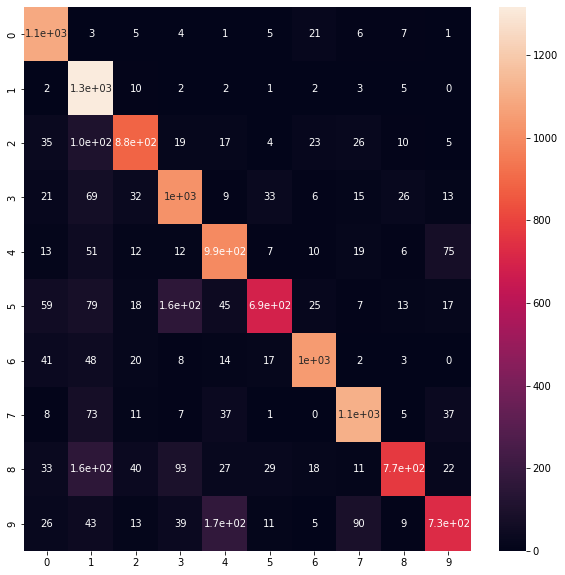

In [ ]:
import seaborn as sn

conf = confusion_matrix(ytest, y_train_pred)
df_cm = pd.DataFrame(conf)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [ ]:
pickle.dump(lr, open("lr_model", 'wb'))
pickle.dump(knn, open("knn_model", 'wb'))
pickle.dump(rf, open("rf_model", 'wb'))
pickle.dump(voting_clf, open("voting_clf_model", 'wb'))